In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
G=yf.download("GOOGL", start="2025-01-01", end="2025-11-01")
G

C:\Users\msath\AppData\Local\Temp\ipykernel_20612\3496132450.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  G=yf.download("GOOGL", start="2025-01-01", end="2025-11-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-01-02,188.814438,191.376094,186.890717,190.030475,20370800
2025-01-03,191.166748,192.582147,189.362632,190.748115,18596200
2025-01-06,196.230240,197.575859,193.220065,193.349632,29563600
2025-01-07,194.854752,200.346841,193.967644,196.469482,26487200
2025-01-08,193.319733,195.652125,191.754842,191.944227,24864800
...,...,...,...,...,...
2025-10-27,269.269989,270.140015,264.279999,264.820007,35235200
2025-10-28,267.470001,270.730011,266.500000,269.690002,29738600


In [12]:
google = G["Close"]

In [13]:
model=ARIMA(google,order=(1,1,1))
Google_model=model.fit()
Google_model.summary()

C:\Users\msath\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\msath\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\msath\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  GOOGL   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -575.279
Date:                Mon, 03 Nov 2025   AIC                           1156.559
Time:                        21:04:21   BIC                           1166.571
Sample:                             0   HQIC                          1160.607
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6448      0.522     -1.237      0.216      -1.667       0.377
ma.L1          0.5750      0.548      1.049      0.294      -0.499       1.649
sigma2        14.7842      0.892     16.568      0.000      13.035      16.533
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               131.28
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.33
Prob(H) (two-sided):                  0.79   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
forecast = Google_model.forecast(steps=30)

C:\Users\msath\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\msath\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
last_date = google.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=30, freq='B')
forecast.index = forecast_dates

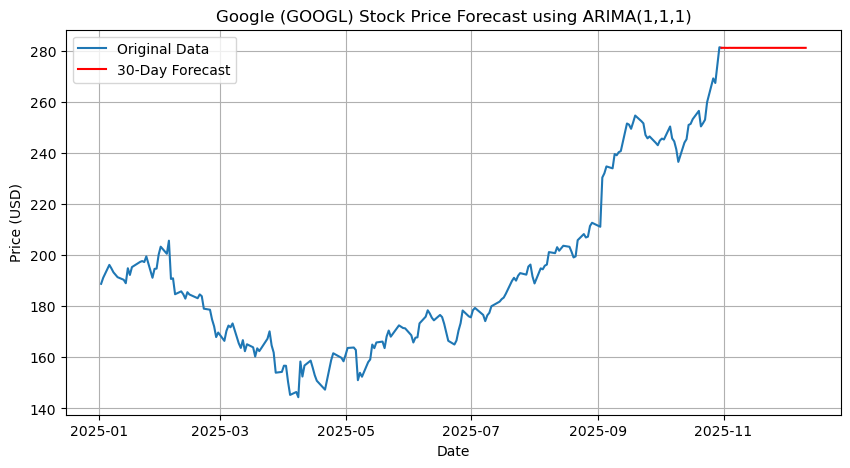

In [16]:
plt.figure(figsize=(10,5))
plt.plot(google, label='Original Data',)
plt.plot(forecast, label='30-Day Forecast', color='red')
plt.title('Google (GOOGL) Stock Price Forecast using ARIMA(1,1,1)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
forecast

2025-10-31    281.262343
2025-11-03    281.215694
2025-11-04    281.245775
2025-11-05    281.226377
2025-11-06    281.238886
2025-11-07    281.230820
2025-11-10    281.236021
2025-11-11    281.232667
2025-11-12    281.234830
2025-11-13    281.233435
2025-11-14    281.234335
2025-11-17    281.233755
2025-11-18    281.234129
2025-11-19    281.233888
2025-11-20    281.234043
2025-11-21    281.233943
2025-11-24    281.234008
2025-11-25    281.233966
2025-11-26    281.233993
2025-11-27    281.233975
2025-11-28    281.233987
2025-12-01    281.233979
2025-12-02    281.233984
2025-12-03    281.233981
2025-12-04    281.233983
2025-12-05    281.233982
2025-12-08    281.233983
2025-12-09    281.233982
2025-12-10    281.233982
2025-12-11    281.233982
Freq: B, Name: predicted_mean, dtype: float64